<a href="https://colab.research.google.com/github/kaditi14/LP-I-/blob/main/final_DA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries

In [ ]:
#Import Statements

import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

##Importing libraries to allow upload from device


In [ ]:
# Importing library to upload file from device

from google.colab import files
uploaded= files.upload()

Saving diabetes.csv to diabetes (1).csv


In [ ]:
df = pd.read_csv('diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


##Describing the dataset

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.shape


(768, 9)

In [ ]:
df['Insulin'].replace([0],df['Insulin'].mean(),inplace = True)
df['Glucose'].replace([0],df['Glucose'].mean(),inplace = True)
df['BloodPressure'].replace([0],df['BloodPressure'].mean(),inplace = True)
df['SkinThickness'].replace([0],df['SkinThickness'].mean(),inplace = True)
df['BMI'].replace([0],df['BMI'].mean(),inplace = True)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


##EDA

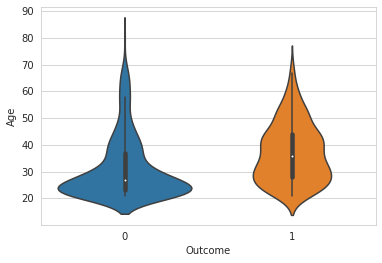

In [ ]:
sns.violinplot(x="Outcome",y="Age",data=df)
plt.show()

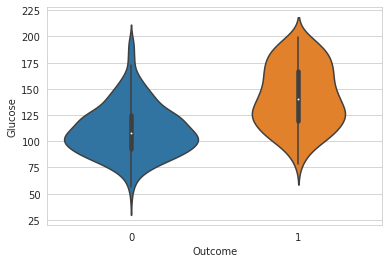

In [ ]:
sns.violinplot(x="Outcome",y="Glucose",data=df)
plt.show()

##Observations:
1. Mean age of people with diabetes is sligtly greater.In both cases the average age is 35
2. Glucose levels for both outcomes is averaged to 125.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been rena

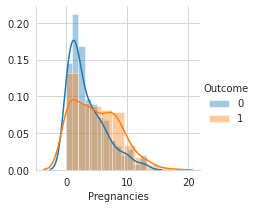

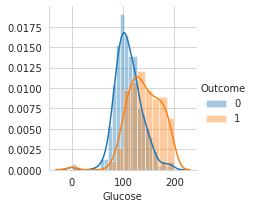

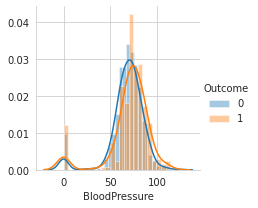

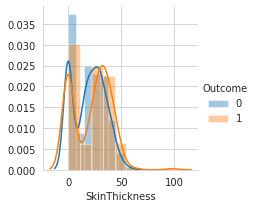

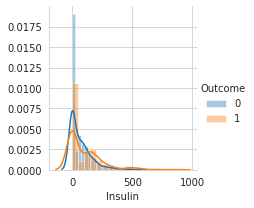

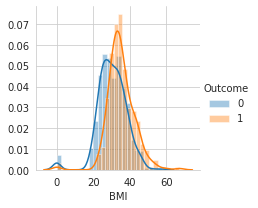

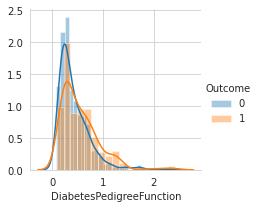

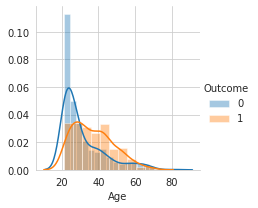

In [ ]:
sns.FacetGrid(df,hue="Outcome",size=3).map(sns.distplot,"Pregnancies").add_legend()
sns.FacetGrid(df,hue="Outcome",size=3).map(sns.distplot,"Glucose").add_legend()
sns.FacetGrid(df,hue="Outcome",size=3).map(sns.distplot,"BloodPressure").add_legend()
sns.FacetGrid(df,hue="Outcome",size=3).map(sns.distplot,"SkinThickness").add_legend()
sns.FacetGrid(df,hue="Outcome",size=3).map(sns.distplot,"Insulin").add_legend()
sns.FacetGrid(df,hue="Outcome",size=3).map(sns.distplot,"BMI").add_legend()
sns.FacetGrid(df,hue="Outcome",size=3).map(sns.distplot,"DiabetesPedigreeFunction").add_legend()
sns.FacetGrid(df,hue="Outcome",size=3).map(sns.distplot,"Age").add_legend()
plt.show()

##Observations:
The density plots are used for the univariate analysis of data.
x-axis shows the features, y-axis shows the densi
1. 

##Correlation Matrix

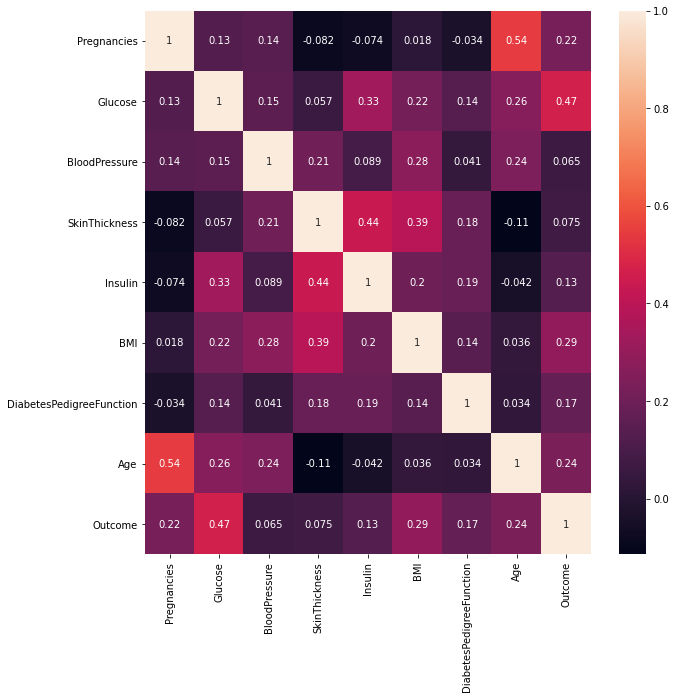

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True) 

##Splitting the dataset

In [ ]:
y = df['Outcome']
x = df.drop(['Outcome'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

##Training the dataset

In [ ]:
model = GaussianNB()
std_scaler = StandardScaler()
#Using standardScaler to normalize the data.It essentially means that it standardizes the feature by subtracting the mean and then scaling to unit variance
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.transform(x_test)

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

##Output

In [ ]:
confusion_matrix(y_test,y_pred)

array([[97, 27],
       [21, 47]])

In [ ]:
print(accuracy_score(y_test, y_pred))

0.75


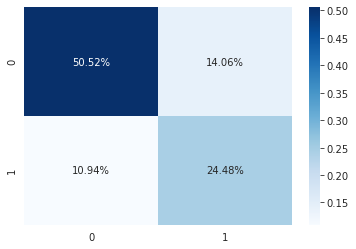

In [ ]:
import seaborn as sns
import numpy as np
cf_matrix=confusion_matrix(y_test,model.predict(x_test))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')